The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-2,  3]), array([-2.,  2.]), array([-1.25586318,  1.04250982]), array([-0.46369902,  0.16948717]), array([ 0.04560632, -0.55589585]), array([ 0.20093705, -1.06174603]), array([ 0.19293281, -1.31105874]), array([ 0.15672788, -1.32825937]), array([ 0.13047792, -1.16882266]), array([ 0.07254588, -0.88935051]), array([-0.0718596 , -0.53911773]), array([-0.31019443, -0.16089016]), array([-0.59828263,  0.20736458]), array([-0.86177096,  0.53232409]), array([-1.03092351,  0.78663467]), array([-1.08650866,  0.95099961]), array([-1.06038344,  1.0165237 ]), array([-1.00091698,  0.98577442]), array([-0.94134712,  0.87150947]), array([-0.88329259,  0.69389165]), array([-0.80487759,  0.4773925 ]), array([-0.68674789,  0.24785772]), array([-0.53460137,  0.02976976]), array([-0.381829  , -0.15606503]), array([-0.27230761, -0.29400866]), array([-0.23260545, -0.37419232]), array([-0.25617292, -0.3927299 ]), 

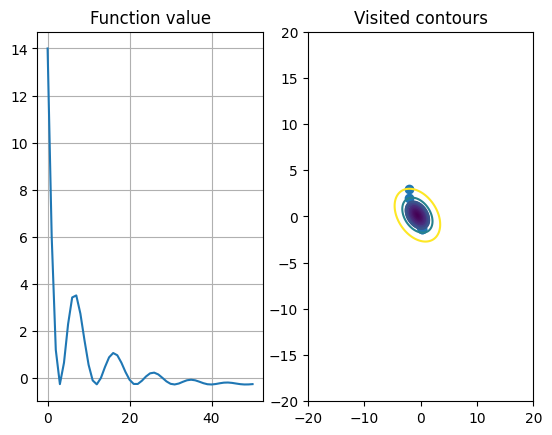

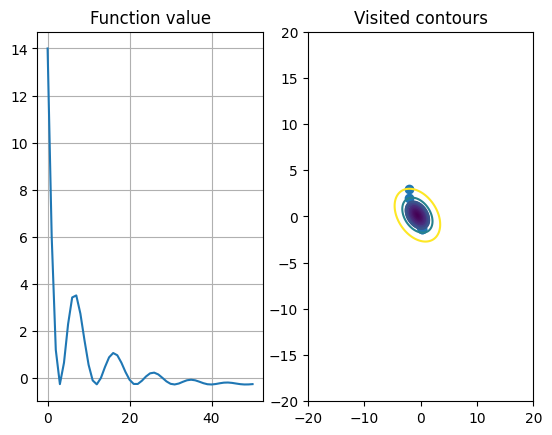

In [135]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi = SearchRegion2d((-20, 20), (-20, 20))


def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x ** 2 + b * y ** 2 + c * x * y + d * x + e * y

    return func


def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])

    return func


f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)


def sum_funcs(f, g):
    return lambda x: f(x) + g(x)


#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-2, 3]), fixed_step_search(0.1), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_with_momentum(0.5, True)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)
#points = steepest_descent_adagrad(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(5), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_adagrad([f1, f2], [g1, g2], 1, np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 100)
#points = steepest_descent_rms_prop(0.999)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_rms_prop(0.999)([f1, f2], [g1, g2], 1, np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 100)
points = steepest_descent_adam(0.9, 0.999)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-2, 3]), fixed_step_search(1), lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch_adam(0.9, 0.999)([f1, f2], [g1, g2], 1, np.array([-2, 3]), fixed_step_search(5), lambda f, steps: len(steps) > 100)

print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

